In [94]:
import json
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np

import mdp as m

In [93]:
with open("stimuli/stimuli_5_5_6.json") as f:
    s = json.load(f)

In [155]:
def viz(board):
    # board = s["game_state"]
    plt.figure() 
    for i, row in enumerate(board):
        for j, cell in enumerate(row):
            color = "gray" if cell == -1 else "none"

            plt.gca().add_patch(plt.Rectangle((j, len(board) - i), 1, 1, ec="k", fc=color, lw=4))
            if cell != -1:
                plt.text(j + 0.45, len(board) - i + 0.45, str(cell), fontsize=22)

    plt.autoscale()
    plt.axis("off")

    plt.axis("equal")
    plt.tight_layout()

In [240]:
reload(m)

<module 'mdp' from '/home/tony/repos/minesweeper/mdp.py'>

In [241]:
mdp = m.MineSweeper(np.array(s[0]["game_state"]), *s[0]["naive_hard_probe"], n_mines=s[0]["num_mines"])
state = mdp.board_to_state(s[0]["game_state"])

In [158]:
states = mdp.traverse(state)

[[ 0 -1  0  0 -1]
 [ 0 -1 -1 -1 -1]
 [ 0 -1  0 -1  0]
 [ 0 -1  0  0 -1]
 [-1  0  0  0  0]]
trying  [(0, 0)]
trying  [(0, 2)]
trying  [(0, 3)]
trying  [(1, 0)]
trying  [(2, 0)]
trying  [(2, 2)]
trying  [(2, 4)]
trying  [(3, 0)]
trying  [(3, 2)]
trying  [(3, 3)]
trying  [(4, 1)]
trying  [(4, 2)]
trying  [(4, 3)]
trying  [(4, 4)]
trying  [(0, 0), (0, 2)]
trying  [(0, 0), (1, 0)]
trying  [(0, 0), (2, 0)]
trying  [(0, 2), (0, 0)]
trying  [(0, 2), (0, 3)]
trying  [(0, 2), (2, 2)]
trying  [(0, 3), (0, 2)]
trying  [(1, 0), (0, 0)]
trying  [(1, 0), (2, 0)]
trying  [(1, 0), (3, 0)]
trying  [(2, 0), (0, 0)]
trying  [(2, 0), (1, 0)]
trying  [(2, 0), (2, 2)]
trying  [(2, 0), (3, 0)]
trying  [(2, 2), (0, 2)]
trying  [(2, 2), (2, 0)]
trying  [(2, 2), (2, 4)]
trying  [(2, 2), (3, 2)]
trying  [(2, 2), (3, 3)]
trying  [(2, 2), (4, 2)]
trying  [(2, 4), (2, 2)]
trying  [(2, 4), (3, 3)]
trying  [(2, 4), (4, 4)]
trying  [(3, 0), (1, 0)]
trying  [(3, 0), (2, 0)]
trying  [(3, 0), (3, 2)]
trying  [(3, 0), (4, 

In [159]:
Q, V = m.vi(mdp, states)

In [160]:
root = m.tree(mdp, state, Q, V)

In [169]:
node = root
while node.children:
    a = list(node.children.keys())[0]
    print(a)
    print(node.state)
    print(node.data[a])
    print(node.value)
    print("next state", mdp.tr(node.state, mdp.actions[a]))
    node = node.children[a]
print(mdp.n_mines)
print(mdp.x, mdp.y)
print(mdp.p_mine(node.state, mdp.x, mdp.y))
print(Q[mdp.hash(node.state)])

14
[[ 0 -1  0  0 -1]
 [ 0 -1 -1 -1 -1]
 [ 0 -1  0 -1  0]
 [ 0 -1  0  0 -1]
 [-1  0  0  0  0]]
([(4, 3)], -1.0)
7.9564526989388025
next state ([array([[ 0, -1,  0,  0, -1],
       [ 0, -1, -1, -1, -1],
       [ 0, -1,  0, -1,  0],
       [ 0, -1,  0,  0,  1],
       [-1,  0,  0,  0,  0]])], [1], -1.0, False)
20
[[ 0 -1  0  0 -1]
 [ 0 -1 -1 -1 -1]
 [ 0 -1  0 -1  0]
 [ 0 -1  0  0  1]
 [-1  0  0  0  0]]
([(0, 2), (0, 3)], -2.0)
9.046921918120002
next state ([array([[ 0, -1,  0,  0,  2],
       [ 0, -1, -1, -1,  2],
       [ 0, -1,  0, -1,  0],
       [ 0, -1,  0,  0,  1],
       [-1,  0,  0,  0,  0]])], [1], -2.0, False)
37
[[ 0 -1  0  0  2]
 [ 0 -1 -1 -1  2]
 [ 0 -1  0 -1  0]
 [ 0 -1  0  0  1]
 [-1  0  0  0  0]]
([(2, 4), (3, 3)], -2.0)
11.158506988000003
next state ([array([[ 0, -1,  0,  0,  2],
       [ 0, -1, -1,  1,  2],
       [ 0, -1,  0,  2,  0],
       [ 0, -1,  0,  0,  1],
       [-1,  0,  0,  0,  0]])], [1], -2.0, False)
21
[[ 0 -1  0  0  2]
 [ 0 -1 -1  1  2]
 [ 0 -1  0  2  0]
 

In [195]:
tmp = np.array([[ 0, -1,  0,  0, -1],
       [ 0, -1, -1, -1, -1],
       [ 0, -1,  0, -1,  0],
       [ 0, -1,  0,  0,  1],
       [-1,  0,  0,  0,  0]])
print(list(mdp.solve_multiple_bp(tmp, [(0, 2), (0, 3)])))

     pcost       dcost       gap    pres   dres   k/t
 0:  2.3333e+00 -4.6667e+00  7e+00  0e+00  1e-16  1e+00
 1:  2.1568e+00  1.3715e+00  8e-01  4e-16  4e-16  1e-01
 2:  2.0105e+00  1.9656e+00  4e-02  7e-16  2e-16  5e-03
 3:  2.0001e+00  1.9997e+00  5e-04  1e-16  9e-17  5e-05
 4:  2.0000e+00  2.0000e+00  5e-06  3e-16  1e-16  5e-07
 5:  2.0000e+00  2.0000e+00  5e-08  2e-16  3e-16  5e-09
Optimal solution found.
[(0, 4, 2), (1, 4, 2)]


In [238]:
print(list(mdp.solve_multiple_rref(tmp, [(0, 2), (0, 3)])))

print(list(mdp.solve_multiple_rref(state, [[2, 0], [3, 0]])))
print(list(mdp.solve_multiple_rref(state, [[1, 0], [2, 0], [3, 0]])))

A, b [[1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1.]] [2. 1.]
U [[1. 1. 1. 1. 0. 0. 2.]
 [0. 0. 1. 1. 1. 1. 1.]]
original row [0. 0. 1. 1. 1. 1.]
new row [0. 0. 1. 1. 1. 1.]
original 1.0 adjusted 1.0
proved [-1. -1. -1. -1. -1. -1.]
original row [1. 1. 1. 1. 0. 0.]
new row [1. 1. 1. 1. 0. 0.]
original 2.0 adjusted 2.0
proved [-1. -1. -1. -1. -1. -1.]
[]
A, b [[1. 1. 1. 0.]
 [0. 1. 1. 1.]] [2. 3.]
U [[1. 1. 1. 0. 2.]
 [0. 1. 1. 1. 3.]]
original row [0. 1. 1. 1.]
new row [0. 1. 1. 1.]
original 3.0 adjusted 3.0
proved [-1.  1.  1.  1.]
original row [1. 1. 1. 0.]
new row [1.]
original 2.0 adjusted 0.0
proved [0. 1. 1. 1.]
[(1, 1, 2), (2, 1, 1), (3, 1, 1), (4, 0, 1)]
A, b [[1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]] [2. 2. 3.]
U [[1. 1. 1. 0. 0. 2.]
 [0. 1. 1. 1. 0. 2.]
 [0. 0. 1. 1. 1. 3.]]
original row [0. 0. 1. 1. 1.]
new row [0. 0. 1. 1. 1.]
original 3.0 adjusted 3.0
proved [-1. -1.  1.  1.  1.]
original row [0. 1. 1. 1. 0.]
new row [0. 1.]
original 2.0 adjusted 0.0
proved [-1.  0. 

In [243]:
import cvxopt
cvxopt.solvers.options["show_progress"] = False

%timeit list(mdp.solve_multiple_rref(state, [[1, 0], [2, 0], [3, 0]]))
%timeit list(mdp.solve_multiple_bp(state, [[1, 0], [2, 0], [3, 0]]))

235 µs ± 4.66 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
926 µs ± 16.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [41]:
[a for i, a in enumerate(mdp.actions) if Q[mdp.hash(state)][i] == Q[mdp.hash(state)].max()]

[[(4, 3)], [(4, 4)]]

In [184]:
print(list(mdp.solve_multiple(state, [[2, 0], [3, 0]])))
print(list(mdp.solve_multiple(state, [[1, 0], [2, 0], [3, 0]])))

[(1, 1, 2), (2, 1, 1), (3, 1, 1), (4, 0, 1)]
[]


In [193]:
print(list(mdp.solve_multiple_bp(state, [[2, 0], [3, 0]])))
print(list(mdp.solve_multiple_bp(state, [[1, 0], [2, 0], [3, 0]])))

     pcost       dcost       gap    pres   dres   k/t
 0:  3.2000e+00 -1.6000e+00  2e+01  2e+00  2e-16  1e+00
 1:  2.9825e+00  2.8959e+00  3e-01  1e-01  1e-16  4e-01
 2:  2.9997e+00  2.9985e+00  4e-03  1e-03  2e-16  4e-03
 3:  3.0000e+00  3.0000e+00  4e-05  1e-05  1e-16  4e-05
 4:  3.0000e+00  3.0000e+00  4e-07  1e-07  2e-16  4e-07
 5:  3.0000e+00  3.0000e+00  4e-09  1e-09  2e-16  4e-09
Optimal solution found.
[(1, 1, 2), (2, 1, 1), (3, 1, 1), (4, 0, 1)]
     pcost       dcost       gap    pres   dres   k/t
 0:  4.0000e+00 -2.2500e+00  2e+01  2e+00  5e-17  1e+00
 1:  3.8232e+00  3.2888e+00  1e+00  3e-01  2e-16  5e-01
 2:  3.9946e+00  3.9654e+00  6e-02  1e-02  3e-16  2e-02
 3:  3.9999e+00  3.9997e+00  6e-04  1e-04  2e-16  2e-04
 4:  4.0000e+00  4.0000e+00  6e-06  1e-06  3e-16  2e-06
 5:  4.0000e+00  4.0000e+00  6e-08  1e-08  1e-15  2e-08
Optimal solution found.
[(0, 1, 1), (1, 1, 2), (2, 1, 1), (3, 1, 1), (4, 0, 1)]


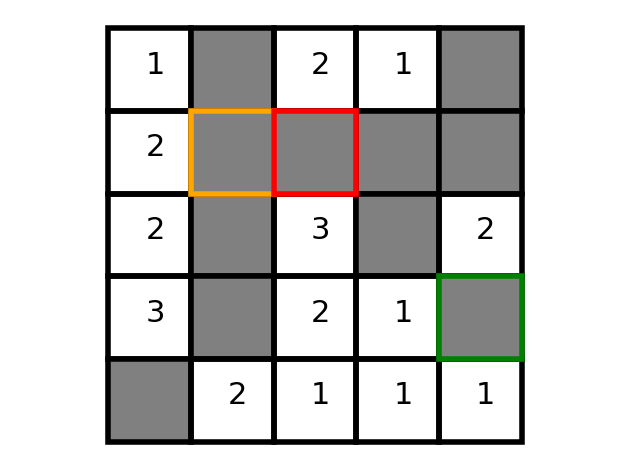

In [17]:
viz(s[0]["game_state"])

for (i, j), c in zip((s[0]["naive_easy_probe"], s[0]["naive_hard_probe"], s[0]["non_naive_probe"]), ("green", "orange", "red")):
    plt.gca().add_patch(plt.Rectangle((j, len(s[0]["game_state"]) - i), 1, 1, ec=c, fc="gray", lw=4))


In [112]:
for i, a in enumerate(mdp.actions):
    print(i, a)

0 flag
1 clear
2 [(0, 0)]
3 [(0, 2)]
4 [(0, 3)]
5 [(1, 0)]
6 [(2, 0)]
7 [(2, 2)]
8 [(2, 4)]
9 [(3, 0)]
10 [(3, 2)]
11 [(3, 3)]
12 [(4, 1)]
13 [(4, 2)]
14 [(4, 3)]
15 [(4, 4)]
16 [(0, 0), (0, 2)]
17 [(0, 0), (1, 0)]
18 [(0, 0), (2, 0)]
19 [(0, 2), (0, 0)]
20 [(0, 2), (0, 3)]
21 [(0, 2), (2, 2)]
22 [(0, 3), (0, 2)]
23 [(1, 0), (0, 0)]
24 [(1, 0), (2, 0)]
25 [(1, 0), (3, 0)]
26 [(2, 0), (0, 0)]
27 [(2, 0), (1, 0)]
28 [(2, 0), (2, 2)]
29 [(2, 0), (3, 0)]
30 [(2, 2), (0, 2)]
31 [(2, 2), (2, 0)]
32 [(2, 2), (2, 4)]
33 [(2, 2), (3, 2)]
34 [(2, 2), (3, 3)]
35 [(2, 2), (4, 2)]
36 [(2, 4), (2, 2)]
37 [(2, 4), (3, 3)]
38 [(2, 4), (4, 4)]
39 [(3, 0), (1, 0)]
40 [(3, 0), (2, 0)]
41 [(3, 0), (3, 2)]
42 [(3, 0), (4, 1)]
43 [(3, 2), (2, 2)]
44 [(3, 2), (3, 0)]
45 [(3, 2), (3, 3)]
46 [(3, 2), (4, 1)]
47 [(3, 2), (4, 2)]
48 [(3, 2), (4, 3)]
49 [(3, 3), (2, 2)]
50 [(3, 3), (2, 4)]
51 [(3, 3), (3, 2)]
52 [(3, 3), (4, 2)]
53 [(3, 3), (4, 3)]
54 [(3, 3), (4, 4)]
55 [(4, 1), (3, 0)]
56 [(4, 1), (3, 2)]
57 [(

In [14]:
s[0]["game_state"]

[[1, -1, 2, 1, -1],
 [2, -1, -1, -1, -1],
 [2, -1, 3, -1, 2],
 [3, -1, 2, 1, -1],
 [-1, 2, 1, 1, 1]]

In [62]:
s[0]

{'length': 5,
 'width': 5,
 'num_mines': 6,
 'game_board': [[1, -1, 2, 1, 1],
  [2, 2, 3, -1, 1],
  [2, -1, 3, 2, 2],
  [3, -1, 2, 1, -1],
  [-1, 2, 1, 1, 1]],
 'game_state': [[1, -1, 2, 1, -1],
  [2, -1, -1, -1, -1],
  [2, -1, 3, -1, 2],
  [3, -1, 2, 1, -1],
  [-1, 2, 1, 1, 1]],
 'naive_solution': [[1, -3, 2, 1, -1],
  [2, -4, -1, -1, -1],
  [2, -3, 3, -4, 2],
  [3, -3, 2, 1, -3],
  [-3, 2, 1, 1, 1]],
 'naive_steps': [[-1, 3, -1, -1, 0],
  [-1, 2, 0, 0, 0],
  [-1, 1, -1, 2, -1],
  [-1, 1, -1, -1, 1],
  [1, -1, -1, -1, -1]],
 'solution': [[1, -3, 2, 1, -4],
  [2, -4, -4, -3, -4],
  [2, -3, 3, -4, 2],
  [3, -3, 2, 1, -3],
  [-3, 2, 1, 1, 1]],
 'non_naive_probe': [1, 2],
 'naive_easy_probe': [3, 4],
 'naive_hard_probe': [1, 1],
 'naive_easy_steps': 1,
 'naive_hard_steps': 2}

In [86]:
len(s)

24